# Make bank configs for simulations

In [91]:
  u'm2_SA_Interbank_deposits',
       u'm3_Rand_Deposits_to_and_loans_to_foreign_banks',
       u'm4_Loans_granted_under_repo_agreement',
       u'm5_Foreign_currency_loans_and_advances',
       u'm6_Redeemable_preference_shares', u'm7_Corporate_installments',
       u'm8_Household_installments', u'm9_Corporate_mortgages',
       u'm10_Household_mortgages', u'm11_Corporate_credit_card',
       u'm12_Household_credit_card', u'm13_Corporate_leasing',
       u'm14_Household_leasing',
        u'm15_Corporate_unsecured_lending',
       u'm16_Household_unsecured_lending', u'm17_Other_credit',
       u'm18_Central_and_provincial_government_bonds',
       u'm19_Other_public_sector_bonds', u'm20_Private_sector_bonds',
       u'm21_Equity_holdings_in_subsidiaries_and_joint_ventures',
       u'm22_Listed_and_unlisted_equities',
       u'm23_Securitisation/ asset-backed_securities',
       u'm24_Derivative_instruments',
       u'm25_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills',
       u'm26_Other_investments_less_impairments', u'm27_Non_financial_assets',
       u'm1_Cash_and_gold_reserves']

Index(['m4_SA_Interbank', 'm5_Rand_Deposits_to_and_loans_to_foreign_banks',
       'm6_Loans_granted_under_repo_agreement',
       'm7_Foreign_currency_loans_and_advances',
       'm8_Redeemable_preference_shares', 'm9_Corporate_installments',
       'm10_Household_installments', 'm11_Corporate_mortgages',
       'm12_Household_mortgages', 'm13_Corporate_credit_card',
       'm14_Household_credit_card', 'm15_Corporate_leasing',
       'm16_Household_leasing', 'm17_Corporate_unsecured_lending',
       'm18_Household_unsecured_lending', 'm19_Other_credit',
       'm20_Central_and_provincial_government_bonds',
       'm21_Other_public_sector_bonds', 'm22_Private_sector_bonds',
       'm23_Equity_holdings_in_subsidiaries_and_joint_ventures',
       'm24_Listed_and_unlisted_equities',
       'm25_Securitisation/ asset-backed_securities',
       'm26_Derivative_instruments',
       'm27_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills',
       'm28_Other_investments_less_impairments', 'm

In [8]:
def make_bank_config_27_assets(t):
    megastring="""<agent identifier="{}"> 
<parameter type="state_variables" name="equity" value="{}"></parameter>
<parameter type="parameters" name="leverage" value="{}"></parameter>
<parameter type="state_variables" name="debt" value="{}"></parameter>
<parameter type="parameters" name="m_1" value="{}" label="Cash and gold reserves "></parameter>
<parameter type="parameters" name="m_2" value="{}" label="SA Interbank deposits"></parameter>
<parameter type="parameters" name="m_3" value="{}" label="Rand Deposits with and loans to foreign banks"></parameter>
<parameter type="parameters" name="m_4" value="{}" label="Loans granted under repo agreement"></parameter>
<parameter type="parameters" name="m_5" value="{}" label="Foreign currency loans and advances"></parameter>
<parameter type="parameters" name="m_6" value="{}" label="Redeemable preference shares"></parameter>
<parameter type="parameters" name="m_7" value="{}" label="Corporate instalment credit "></parameter>
<parameter type="parameters" name="m_8" value="{}" label="Household instalment credit "></parameter>
<parameter type="parameters" name="m_9" value="{}" label="Corporate mortgage"></parameter>
<parameter type="parameters" name="m_10" value="{}" label="Household mortgage"></parameter>
<parameter type="parameters" name="m_11" value="{}" label="Corporate_credit_card"></parameter>
<parameter type="parameters" name="m_12" value="{}" label="Household_credit_card"></parameter>
<parameter type="parameters" name="m_13" value="{}" label="Corporate_leasing"></parameter>
<parameter type="parameters" name="m_14" value="{}" label="Household_leasing"></parameter>
<parameter type="parameters" name="m_15" value="{}" label="Corporate_unsecured_lending"></parameter>
<parameter type="parameters" name="m_16" value="{}" label="Household_unsecured_lending"></parameter>
<parameter type="parameters" name="m_17" value="{}" label="Other_credit"></parameter>
<parameter type="parameters" name="m_18" value="{}" label="Central_and_provincial_government_bonds"></parameter>
<parameter type="parameters" name="m_19" value="{}" label="Other_public_sector_bonds"></parameter>
<parameter type="parameters" name="m_20" value="{}" label="Private_sector_bonds"></parameter>
<parameter type="parameters" name="m_21" value="{}" label="Equity_holdings_in_subsidiaries_and_joint_ventures"></parameter>
<parameter type="parameters" name="m_22" value="{}" label="Listed_and_unlisted_equities"></parameter>
<parameter type="parameters" name="m_23" value="{}" label="Securitisation/ asset-backed_securities"></parameter>
<parameter type="parameters" name="m_24" value="{}" label="Derivative instruments"></parameter>
<parameter type="parameters" name="m_25" value="{}" label="Treasury bills, SA Reserve Bank bills,  Land Bank bills "></parameter>
<parameter type="parameters" name="m_26" value="{}" label="Other investments"></parameter>
<parameter type="parameters" name="m_27" value="{}" label="Non financial assets"></parameter>
</agent>""".format( t['name'].values[0],t['equity'].values[0], 
                   t['leverage'].values[0],
                   t['debt'].values[0],
                   t['m1_Cash_and_gold_reserves'].values[0],
                   t['m2_SA_Interbank_deposits'].values[0],
                   t['m3_Rand_Deposits_to_and_loans_to_foreign_banks'].values[0],
                   t['m4_Loans_granted_under_repo_agreement'].values[0],
                   t['m5_Foreign_currency_loans_and_advances'].values[0], 
                   t['m6_Redeemable_preference_shares'].values[0],
                   t['m7_Corporate_installments'].values[0],      
                   t['m8_Household_installments'].values[0],
                   t['m9_Corporate_mortgages'].values[0],
                   t['m10_Household_mortgages'].values[0],
                   t['m11_Corporate_credit_card'].values[0],     
                   t['m12_Household_credit_card'].values[0],
                   t['m13_Corporate_leasing'].values[0],
                   t['m14_Household_leasing'].values[0],
                   t['m15_Corporate_unsecured_lending'].values[0],
                   t['m16_Household_unsecured_lending'].values[0],
                   t['m17_Other_credit'].values[0],
                   t['m18_Central_and_provincial_government_bonds'].values[0],
                   t['m19_Other_public_sector_bonds'].values[0],
                   t['m20_Private_sector_bonds'].values[0],
                   t['m21_Equity_holdings_in_subsidiaries_and_joint_ventures'].values[0],
                   t[ 'm22_Listed_and_unlisted_equities'].values[0], 
                   t['m23_Securitisation/ asset-backed_securities'].values[0],   
                   t['m24_Derivative_instruments'].values[0],
                   t['m25_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills'].values[0],     
                   t['m26_Other_investments_less_impairments'].values[0], 
                   t['m27_Non_financial_assets'].values[0])

    return megastring

def write_to_file(megastring, name):
    with open(name, 'w') as file:
        file.write(megastring)

In [7]:
# we need to add m1+m2+m3!
# okay this was not great, but have to do it - future: create function for 27 assets in asset_weights.py 

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
os.chdir('/Users/admin/git_repos/ba900/')

banks=pd.read_csv('overview_top10.csv') # - make cas weight
b=banks[['m1_South_African_bank_notes_and_subsidiary_coin',
       'm2_Gold_coin_and_bullion',
       'm3_Domestic_currency_deposits_with_SA_Reserve_Bank']]
b['m1_Cash_and_gold_reserves']=b.iloc[:,:].sum(axis=1)
banks['m1_Cash_and_gold_reserves']=b['m1_Cash_and_gold_reserves']
# banks['m1_Cash_and_gold_reserves']=

oldnames=banks.columns[13:-1]
temp=[]
count = 2
for n in oldnames:
    construct_name =n
    name, rest = construct_name.split('_', 1)
    rest = "m{}_{}".format(count,rest)
    temp.append(rest)
    count+=1
temp[0] = 'm2_SA_Interbank_deposits'
column_indices = [i for i in range(13,39)]
new_names = temp
old_names = banks.columns[column_indices]
banks.rename(columns=dict(zip(old_names, new_names)), inplace=True)

#df.columns[-1]#'m1_Cash_and_gold_reserves'
 
# choose one time 
year=2015
month = 12

df = banks[(banks.year==year)&(banks.month==month)]

if not os.path.exists('./configs'):
    os.makedirs('./configs')

sys.path.append("..") 
from ba900 import assets_to_weights   
transform=assets_to_weights.tranformer()
cols=df.columns[13:]
for n in df.name.unique():
    t=df[df.name==n]
    config=make_bank_config_27_assets(t)
    f= "./configs/agent_{}.xml".format(n)
    write_to_file(config, f)
        
 

/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# we need to add m1+m2+m3!
# okay this was not great, but have to do it - future: create function for 27 assets in asset_weights.py 

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
os.chdir('/Users/admin/git_repos/ba900/')

banks=pd.read_csv('overview_top10.csv') # - make cas weight
b=banks[['m1_South_African_bank_notes_and_subsidiary_coin',
       'm2_Gold_coin_and_bullion',
       'm3_Domestic_currency_deposits_with_SA_Reserve_Bank']]
b['m1_Cash_and_gold_reserves']=b.iloc[:,:].sum(axis=1)
banks['m1_Cash_and_gold_reserves']=b['m1_Cash_and_gold_reserves']
# banks['m1_Cash_and_gold_reserves']=

oldnames=banks.columns[13:-1]
temp=[]
count = 2
for n in oldnames:
    construct_name =n
    name, rest = construct_name.split('_', 1)
    rest = "m{}_{}".format(count,rest)
    temp.append(rest)
    count+=1
temp[0] = 'm2_SA_Interbank_deposits'
column_indices = [i for i in range(13,39)]
new_names = temp
old_names = banks.columns[column_indices]
banks.rename(columns=dict(zip(old_names, new_names)), inplace=True)

#df.columns[-1]#'m1_Cash_a

In [14]:
  
# choose one time 
years=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [12,11,10,9,8,7,6,5,4,3,2,1]

for year in years:
    for month in months:
        p ='./configs/'+str(year)+"-"+str(month)
        if not os.path.exists(p):
            os.makedirs(p)

        df = banks[(banks.year==year)&(banks.month==month)]
        sys.path.append("..") 
        from ba900 import assets_to_weights   
        transform=assets_to_weights.tranformer()
        cols=df.columns[13:]
        for n in df.name.unique():
            t=df[df.name==n]
            config=make_bank_config_27_assets(t)

            f= "{}/agent_{}.xml".format(p,n)
            write_to_file(config, f)


In [17]:
'/Users/admin/Downloads/Note_FSR_1119_ready/Plots/Figure2/shocks_1e-13_m12_sbsa.csv'

In [3]:
banks.columns

Index([u'time', u'id', u'name', u'equity', u'year', u'month', u'debt',
       u'leverage', u'total_assets', u'time.1',
       u'm1_South_African_bank_notes_and_subsidiary_coin',
       u'm2_Gold_coin_and_bullion',
       u'm3_Domestic_currency_deposits_with_SA_Reserve_Bank',
       u'm2_SA_Interbank_deposits',
       u'm3_Rand_Deposits_to_and_loans_to_foreign_banks',
       u'm4_Loans_granted_under_repo_agreement',
       u'm5_Foreign_currency_loans_and_advances',
       u'm6_Redeemable_preference_shares', u'm7_Corporate_installments',
       u'm8_Household_installments', u'm9_Corporate_mortgages',
       u'm10_Household_mortgages', u'm11_Corporate_credit_card',
       u'm12_Household_credit_card', u'm13_Corporate_leasing',
       u'm14_Household_leasing', u'm15_Corporate_unsecured_lending',
       u'm16_Household_unsecured_lending', u'm17_Other_credit',
       u'm18_Central_and_provincial_government_bonds',
       u'm19_Other_public_sector_bonds', u'm20_Private_sector_bonds',
       u

In [18]:
#df.columns[-1]#'m1_Cash_and_gold_reserves'

import sys
import os
import sys
sys.path.append("..") 
 
from ba900 import assets_to_weights   

transform=assets_to_weights.tranformer()

cols=df.columns[13:]

for n in df.name.unique():
    t=df[df.name==n]
    config=make_bank_config_27_assets(t)
    f= "aagent_{}.xml".format(n)
    write_to_file(config, f)
        
    break

In [4]:
#  test
banks.iloc[:,13:].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
983    1.0
984    1.0
985    1.0
986    1.0
987    1.0
Length: 988, dtype: float64

In [ ]:
"""
m1_South_African_bank_notes_and_subsidiary_coin	
m2_Gold_coin_and_bullion	
m3_Domestic_currency_deposits_with_SA_Reserve_Bank	
m4_SA_Interbank	m5_Rand_Deposits_to_and_loans_to_foreign_banks	
m6_Loans_granted_under_repo_agreement	
m7_Foreign_currency_loans_and_advances	
m8_Redeemable_preference_shares
m9_Corporate_installments	
m10_Household_installments	
m11_Corporate_mortgages	
m12_Household_mortgages
m13_Corporate_credit_card	
m14_Household_credit_card	
m15_Corporate_leasing	
m16_Household_leasing	
m17_Corporate_unsecured_lending	
m18_Household_unsecured_lending	
m19_Other_credit	
m20_Central_and_provincial_government_bonds
m21_Other_public_sector_bonds	
m22_Private_sector_bonds	
m23_Equity_holdings_in_subsidiaries_and_joint_ventures	
m24_Listed_and_unlisted_equities	
m25_Securitisation_asset_backed_securities	
m26_Derivative_instruments	
m27_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills	
m28_Other_investments_less_impairments	
m29_Non_financial_assets"""

In [122]:
df
cols

Index(['m2_SA_Interbank_deposits',
       'm3_Rand_Deposits_to_and_loans_to_foreign_banks',
       'm4_Loans_granted_under_repo_agreement',
       'm5_Foreign_currency_loans_and_advances',
       'm6_Redeemable_preference_shares', 'm7_Corporate_installments',
       'm8_Household_installments', 'm9_Corporate_mortgages',
       'm10_Household_mortgages', 'm11_Corporate_credit_card',
       'm12_Household_credit_card', 'm13_Corporate_leasing',
       'm14_Household_leasing', 'm15_Corporate_unsecured_lending',
       'm16_Household_unsecured_lending', 'm17_Other_credit',
       'm18_Central_and_provincial_government_bonds',
       'm19_Other_public_sector_bonds', 'm20_Private_sector_bonds',
       'm21_Equity_holdings_in_subsidiaries_and_joint_ventures',
       'm22_Listed_and_unlisted_equities',
       'm23_Securitisation/ asset-backed_securities',
       'm24_Derivative_instruments',
       'm25_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills',
       'm26_Other_investments_less_im

In [135]:
config 

'\n    <agent identifier="STANDARDBANK ">\n    <parameter type="state_variables" name="equity" value="86200249000.0"></parameter>\n     <parameter type="parameters" name="leverage" value="13.078011688806145"></parameter>\n     <parameter type="state_variables" name="debt" value="1127327864000.0"></parameter>\n     <parameter type="parameters" name="m_1" value="0.02452122590422427" label="Cash and gold reserves "></parameter>\n     <parameter type="parameters" name="m_2" value="0.010719721167267264" label="SA Interbank deposits, loans and advances"></parameter>\n     <parameter type="parameters" name="m_3" value="0.004058569346056839" label="Rand Deposits with and loans to foreign banks"></parameter>\n     <parameter type="parameters" name="m_4" value="0.03594145165057252" label="Loans granted under repo agreement"></parameter>\n     <parameter type="parameters" name="m_5" value="0.12918276084470076" label="Foreign currency loans and advances"></parameter>\n     <parameter type="paramet

In [133]:
def make_bank_config_27_assets(t):
    megastring="""
    <agent identifier="{}">
    <parameter type="state_variables" name="equity" value="{}"></parameter>
     <parameter type="parameters" name="leverage" value="{}"></parameter>
     <parameter type="state_variables" name="debt" value="{}"></parameter>
     <parameter type="parameters" name="m_1" value="{}" label="Cash and gold reserves "></parameter>
     <parameter type="parameters" name="m_2" value="{}" label="SA Interbank deposits, loans and advances"></parameter>
     <parameter type="parameters" name="m_3" value="{}" label="Rand Deposits with and loans to foreign banks"></parameter>
     <parameter type="parameters" name="m_4" value="{}" label="Loans granted under repo agreement"></parameter>
     <parameter type="parameters" name="m_5" value="{}" label="Foreign currency loans and advances"></parameter>
     <parameter type="parameters" name="m_6" value="{}" label="Redeemable preference shares"></parameter>
     <parameter type="parameters" name="m_7" value="{}" label="corporate instalment credit "></parameter>
     <parameter type="parameters" name="m_8" value="{}" label="household instalment credit "></parameter>
     <parameter type="parameters" name="m_9" value="{}" label="corporate mortgage"></parameter>
     <parameter type="parameters" name="m_10" value="{}" label="household mortgage"></parameter>
     <parameter type="parameters" name="m_11" value="{}" label="Unsecured lending corporate"></parameter>
     <parameter type="parameters" name="m_12" value="{}" label="Unsecured lending households"></parameter>
     <parameter type="parameters" name="m_13" value="{}" label="Other credit (credit card + leasing + Overdarft + factoring debt)"></parameter>
     <parameter type="parameters" name="m_14" value="{}" label="Central and provincial government bonds"></parameter>
     <parameter type="parameters" name="m_15" value="{}" label="Other public-sector bonds"></parameter>
     <parameter type="parameters" name="m_16" value="{}" label="Private sector bonds"></parameter>
     <parameter type="parameters" name="m_17" value="{}" label="Equity holdings in subsidiaries and joint ventures"></parameter>
     <parameter type="parameters" name="m_18" value="{}" label="Listed and unlisted equities"></parameter>
     <parameter type="parameters" name="m_19" value="{}" label="Securitisation/ asset-backed securities"></parameter>
     <parameter type="parameters" name="m_20" value="{}" label="Derivative instruments"></parameter>
     <parameter type="parameters" name="m_21" value="{}" label="Treasury bills, SA Reserve Bank bills,  Land Bank bills "></parameter>
     <parameter type="parameters" name="m_22" value="{}" label="Other investments"></parameter>
     <parameter type="parameters" name="m_23" value="{}" label="Non financial assets"></parameter>
      <parameter type="parameters" name="m_24" value="{}" label="Derivative instruments"></parameter>
     <parameter type="parameters" name="m_25" value="{}" label="Treasury bills, SA Reserve Bank bills,  Land Bank bills "></parameter>
     <parameter type="parameters" name="m_26" value="{}" label="Other investments"></parameter>
     <parameter type="parameters" name="m_27" value="{}" label="Non financial assets"></parameter>
    </agent>""".format( t['name'].values[0],t['equity'].values[0], 
                       t['leverage'].values[0],
                       t['debt'].values[0],
                       t['m1_Cash_and_gold_reserves'].values[0],
                       t['m2_SA_Interbank_deposits'].values[0],
                       t['m3_Rand_Deposits_to_and_loans_to_foreign_banks'].values[0],
                       t['m4_Loans_granted_under_repo_agreement'].values[0],
                       t['m5_Foreign_currency_loans_and_advances'].values[0], 
                       t['m6_Redeemable_preference_shares'].values[0],
                       t['m7_Corporate_installments'].values[0],      
                       t['m8_Household_installments'].values[0],
                       t['m9_Corporate_mortgages'].values[0],
                       t['m10_Household_mortgages'].values[0],
                       t['m11_Corporate_credit_card'].values[0],     
                       t['m12_Household_credit_card'].values[0],
                       t['m13_Corporate_leasing'].values[0],
                       t['m14_Household_leasing'].values[0],
                       t['m15_Corporate_unsecured_lending'].values[0],
                       t['m16_Household_unsecured_lending'].values[0],
                       t['m17_Other_credit'].values[0],
                       t['m18_Central_and_provincial_government_bonds'].values[0],
                       t['m19_Other_public_sector_bonds'].values[0],
                       t['m20_Private_sector_bonds'].values[0],
                       t['m21_Equity_holdings_in_subsidiaries_and_joint_ventures'].values[0],
                       t[ 'm22_Listed_and_unlisted_equities'].values[0], 
                       t['m23_Securitisation/ asset-backed_securities'].values[0],   
                       t['m24_Derivative_instruments'].values[0],
                       t['m25_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills'].values[0],     
                       t['m26_Other_investments_less_impairments'].values[0], 
                       t['m27_Non_financial_assets'].values[0])
    
    return megastring

def write_to_file(megastring, name):
    with open(name, 'w') as file:
        file.write(megastring)

In [54]:
megastring

'\n<agent identifier="SBSA">\n<parameter type="state_variables" name="equity" value="86200249000.0"></parameter>\n <parameter type="parameters" name="leverage" value="13.0780116888061"></parameter>\n <parameter type="state_variables" name="debt" value="1127327864000.0"></parameter>\n <parameter type="parameters" name="m_1" value="0.0245212259042243" label="Cash and gold reserves "></parameter>\n <parameter type="parameters" name="m_2" value="0.0107197211672673" label="SA Interbank deposits, loans and advances "></parameter>\n <parameter type="parameters" name="m_3" value="0.00405856934605684" label="Rand Deposits with and loans to foreign banks"></parameter>\n <parameter type="parameters" name="m_4" value="0.0359414516505725" label="Loans granted under repo agreement"></parameter>\n <parameter type="parameters" name="m_5" value="0.129182760844701" label="Foreign currency loans and advances d 134),"></parameter>\n <parameter type="parameters" name="m_6" value="0.0170625845237423" label=

# Make overview table 

In [1]:
pwd

'/Users/admin/git_repos/ba900/processing'

In [16]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]

import os
os.chdir('/Users/admin/git_repos/ba900/')

for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl"):
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])
MASTER['Value'] = pd.to_numeric(MASTER['Value'])


./data/output/df2013.pkl
./data/output/df2012.pkl
./data/output/df2010.pkl
./data/output/df2011.pkl
./data/output/df2015.pkl
./data/output/df2014.pkl
./data/output/df2016.pkl
./data/output/df2017.pkl
./data/output/df2019.pkl
./data/output/df2018.pkl
./data/output/df2008.pkl
./data/output/df2020.pkl
./data/output/df2009.pkl


In [17]:
import sys
import os
import sys
sys.path.append("..") 
 
from ba900 import assets_to_weights   

transform=assets_to_weights.tranformer()

from_=['ABSA BANK LTD ','THE STANDARD BANK OF S A LTD','FIRSTRAND BANK LIMITED ','NEDBANK LTD ','INVESTEC BANK LTD ',\
      'CITIBANK N.A ','CAPITEC BANK ' , 'AFRICAN BANK LIMITED ','JPMORGAN CHASE BANK             ',\
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ','STANDARD CHARTERED BANK ',\
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH '
      ]
to_=['ABSA', 'STANDARDBANK', 'FNB','NEDBANK', 'INVESTEC',\
    'CITYBANK','CAPITEC','AfricanB','JPM',\
     'HSBC','CHARTERED','ChinaConstruction']
renamed=transform.relabel_banknames(from_,to_,MASTER)
t=transform.get_biggest_banks( "2015", "12", renamed, 10)

top10=t.values.tolist()
renamed=renamed[renamed.InstitutionDescription.isin(top10)]
years =['2010','2011','2012','2013', '2014','2015','2016','2017','2018']

months=["{:02d}".format(i) for i in range(1,13)]
df=transform.get_overview_timeseries(top10,months,years,renamed)
 


changed ABSA BANK LTD  to: ABSA
changed THE STANDARD BANK OF S A LTD to: STANDARDBANK
changed FIRSTRAND BANK LIMITED  to: FNB
changed NEDBANK LTD  to: NEDBANK
changed INVESTEC BANK LTD  to: INVESTEC
changed CITIBANK N.A  to: CITYBANK
changed CAPITEC BANK  to: CAPITEC
changed AFRICAN BANK LIMITED  to: AfricanB
changed JPMORGAN CHASE BANK              to: JPM
changed THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH  to: HSBC
changed STANDARD CHARTERED BANK  to: CHARTERED
changed CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH  to: ChinaConstruction


/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Value'] = pd.to_numeric(a['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [18]:
df.to_csv('overview_top10.csv')

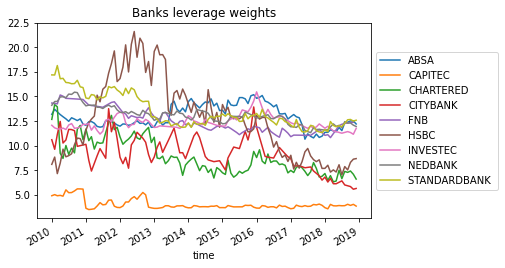

In [24]:
f = plt.figure()
df1 =df[df.name!='AfricanB']
grpA= df1.groupby('name')

plt.title('Banks leverage weights', color='black') 
(grpA['leverage'].plot( legend=True)) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
df1.groupby('name').filter(lambda x: True)

,id,name,equity,year,month,debt,leverage,total_assets,time,m1_South_African_bank_notes_and_subsidiary_coin,...,m20_Central_and_provincial_government_bonds,m21_Other_public_sector_bonds,m22_Private_sector_bonds,m23_Equity_holdings_in_subsidiaries_and_joint_ventures,m24_Listed_and_unlisted_equities,m25_Securitisation/ asset-backed_securities,m26_Derivative_instruments,m27_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills,m28_Other_investments_less_impairments,m29_Non_financial_assets
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,A,STANDARDBANK,4.387390e+10,2010,01,7.543478e+11,17.193545,7.982217e+11,2010-01-01,4.233073e-03,...,0.014254,0.019691,0.000504,0.001228,0.006232,0.001359,0.175709,0.000000,0.023607,0.019077
2010-01-01,B,ABSA,4.597213e+10,2010,01,6.063418e+11,13.189336,6.523139e+11,2010-01-01,3.730647e-03,...,0.062683,0.000496,0.008178,0.005615,0.011543,0.000000,0.047255,0.001092,-0.006054,0.031246
2010-01-01,C,FNB,3.557742e+10,2010,01,5.099837e+11,14.334476,5.455611e+11,2010-01-01,4.787031e-03,...,0.046957,0.007336,0.005153,0.003379,0.009090,0.000000,0.068109,0.000000,0.045099,0.025559
2010-01-01,D,NEDBANK,3.389178e+10,2010,01,4.780842e+11,14.106197,5.119759e+11,2010-01-01,2.665491e-03,...,0.043640,0.013581,0.007794,0.020127,0.003518,0.000000,0.023746,0.000000,-0.011525,0.023068
2010-01-01,E,INVESTEC,1.415958e+10,2010,01,1.709345e+11,12.072007,1.850941e+11,2010-01-01,3.943940e-07,...,0.005363,0.010869,0.010793,0.003633,0.023856,0.000000,0.036994,0.000000,0.095898,0.006427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,E,INVESTEC,3.530898e+10,2018,12,4.151002e+11,11.756221,4.504092e+11,2018-12-01,5.815756e-04,...,0.053019,0.008792,0.043438,0.017890,0.013489,0.000000,0.016989,0.000000,0.079411,0.019328
2018-12-01,F,CAPITEC,2.002160e+10,2018,12,7.722457e+10,3.857063,9.724617e+10,2018-12-01,4.258888e-02,...,0.000000,0.000000,0.000000,0.000000,0.004564,0.000000,0.000031,0.000000,-0.000618,0.043794
2018-12-01,G,CITYBANK,9.075350e+09,2018,12,5.128697e+10,5.651239,6.036232e+10,2018-12-01,3.548273e-05,...,0.124136,0.000000,0.000000,0.000000,0.000000,0.000000,0.049066,0.000000,0.249109,0.005292


<AxesSubplot:title={'center':'Leverage debt/equity, top 10 banks'}, xlabel='time'>

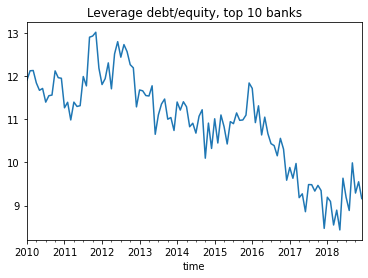

In [50]:
df1 =df[df.name!='AfricanB']
d2=df1
d3=d2.reset_index(drop=True)
d4=(d3.groupby(['name', 'time','leverage'], as_index=False).mean()
            .groupby('time').mean())
d4.leverage.plot(title='Leverage debt/equity, top 10 banks')

<AxesSubplot:title={'center':'Leverage debt/equity, top 4 banks'}, xlabel='time'>

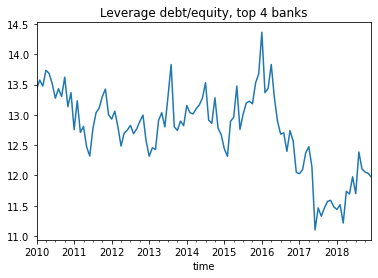

In [52]:
 
to_keep=['ABSA', 'STANDARDBANK', 'FNB','NEDBANK', 'INVESTEC']

# df1=df[~df.name.isin(to_keep)]
df1=df[df.name.isin(to_keep)]

d2=df1
d3=d2.reset_index(drop=True)
d4=(d3.groupby(['name', 'time','leverage'], as_index=False).mean()
            .groupby('time').mean())
d4.leverage.plot(title='Leverage debt/equity, top 4 banks')

In [29]:
print(round(df4.iloc[0:1,-29:].sum(axis=1).values[0]))

1


In [17]:
renamed[renamed.InstitutionDescription=='FNB']

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
0,1,Chequej,DEPOSITS (total of items 2 and 32),1,1.648665e+08,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
1,2,Savings,DEPOSITS (total of items 2 and 32),1,6.889990e+06,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
2,3,Up to 1 day,DEPOSITS (total of items 2 and 32),1,1.772972e+08,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
3,4,More than 1 day to 1 month,DEPOSITS (total of items 2 and 32),1,7.181958e+07,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
4,5,More than 1 month to 6 months,DEPOSITS (total of items 2 and 32),1,9.803116e+07,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2,Of which: on-lentb,Other securities (total of items 383 to 384),382,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
12,1,Total lent to other parties,Domestic sector (SA residents),383,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
13,2,Of which: on-lentb,Domestic sector (SA residents),383,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
14,1,Total lent to other parties,Foreign sector (non-residents),384,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01


In [ ]:
 # id	Name	Equity	Leverage	Debt	m1 Cash and gold reserves 
#  A 	SBSA	 86 200 249 000 	13.1	1127327864000	2.5%
#  C 	FNB	 75 526 054 370 	12.0	904393561840	2.7%
#  B 	ABSA	 57 255 883 000 	15.2	869270227000	2.8%
#  D 	NEDBANK	 57 683 474 000 	13.0	751035802000	2.9%
#  E 	INVESTEC	 24 265 229 000 	14.5	352780580000	1.9%
#  F 	CITYBANK	 5 123 291 030 	13.9	71388112090	0.8%
#  G 	CAPITEC	 13 056 412 000 	3.7	48913724000	5.8%
#  H 	AfricanB	 7 466 274 000 	6.8	50419037000	2.2%
#  I 	JPM	 3 246 873 000 	16.6	53788923000	0.3%
#  J 	HSBC	 3 919 312 000 	11.7	45886507000	1.9%
#  K 	CHARTERED	 3 688 896 000 	9.4	34731129000	1.7%
#  L 	BoCHINA	 4 178 651 000 	7.5	31464510000	1.1%
#  M 	DeutscheB	 1 433 355 000 	14.9	21321901000	0.1%
#  N 	BNP	 636 568 000 	21.8	13862348000	0.3%
#  O 	SOCIETEG	 666 836 000 	16.6	11058957000	1.3%

/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [33]:
df3

,id,name,equity,year,month,debt,leverage,total_assets,time,m1_South_African_bank_notes_and_subsidiary_coin,...,m20_Central_and_provincial_government_bonds,m21_Other_public_sector_bonds,m22_Private_sector_bonds,m23_Equity_holdings_in_subsidiaries_and_joint_ventures,m24_Listed_and_unlisted_equities,m25_Securitisation/ asset-backed_securities,m26_Derivative_instruments,m27_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills,m28_Other_investments_less_impairments,m29_Non_financial_assets
time,,,,,,,,,,,,,,,,,,,,,
2015-11-01,A,ABSA,5.729744e+10,2015,11,8.635550e+11,15.071442,9.208524e+11,2015-11-01,0.007468,...,0.080122,0.002978,0.006269,0.000501,0.002535,0.0,0.058537,0.0,0.011987,0.053888


In [45]:
debt/equity

16.717632831297976

changed ABSA BANK LTD  to: ABSA
changed THE STANDARD BANK OF S A LTD to: STANDARDBANK


array(['SASFIN BANK LTD ', 'BIDVEST BANK LIMITED ', 'IMPERIAL BANK LTD ',
       'MEEG BANK LIMITED ', 'STATE BANK OF INDIA ', 'NEDBANK LTD ',
       'ALBARAKA BANK LTD ', 'ABSA', 'COMMERZBANK AKTIENGESELLSCHAFT ',
       'GBS MUTUAL BANK ', 'BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
       'INVESTEC BANK LTD ', 'HABIB OVERSEAS BANK LTD ',
       'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'AFRICAN BANK LIMITED ',
       'JPMORGAN CHASE BANK             ', 'GRINDROD BANK LTD ',
       'CITIBANK N.A ', 'CAPITEC BANK ', 'VBS MUTUAL BANK ',
       'BANK OF CHINA LTD JHB BRANCH    ', 'ICICI BANK LIMITED ',
       'STANDARDBANK ', 'HBZ BANK LTD ',
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH ',
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ',
       'MERCANTILE BANK LTD ', 'THE S A BANK OF ATHENS LTD ',
       'CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK ', 'CANARA BANK ',
       'UBANK LIMITED ', 'DEUTSCHE BANK AG ', 'BANK OF BAROD

In [47]:
absa_assets['InstitutionDescription'] = absa_assets['InstitutionDescription'].apply(lambda x: x.replace('ABSA BANK LTD ', 'ABSA'))


/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
absa_assets

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
18,1,TOTAL,TOTAL EQUITY AND LIABILITIES (total of items 9...,102,720666310.0,5,BA900,BA900 Forms,2008,11,30,34118,ABSA,20130502,2008-11-01


In [46]:
# id	Name	Equity	Leverage	Debt	m1 Cash and gold reserves 
#  A 	SBSA	 86 200 249 000 	13.1	1127327864000	2.5%
#  C 	FNB	 75 526 054 370 	12.0	904393561840	2.7%
#  B 	ABSA	 57 255 883 000 	15.2	869270227000	2.8%
#  D 	NEDBANK	 57 683 474 000 	13.0	751035802000	2.9%
#  E 	INVESTEC	 24 265 229 000 	14.5	352780580000	1.9%
#  F 	CITYBANK	 5 123 291 030 	13.9	71388112090	0.8%
#  G 	CAPITEC	 13 056 412 000 	3.7	48913724000	5.8%
#  H 	AfricanB	 7 466 274 000 	6.8	50419037000	2.2%
#  I 	JPM	 3 246 873 000 	16.6	53788923000	0.3%
#  J 	HSBC	 3 919 312 000 	11.7	45886507000	1.9%
#  K 	CHARTERED	 3 688 896 000 	9.4	34731129000	1.7%
#  L 	BoCHINA	 4 178 651 000 	7.5	31464510000	1.1%
#  M 	DeutscheB	 1 433 355 000 	14.9	21321901000	0.1%
#  N 	BNP	 636 568 000 	21.8	13862348000	0.3%
#  O 	SOCIETEG	 666 836 000 	16.6	11058957000	1.3%

0.05981708116760684

In [ ]:
THE STANDARD BANK OF S A LTD 
14                              FIRSTRAND BANK LIMITED 
14                                       ABSA BANK LTD 
14                                         NEDBANK LTD 
14                                   INVESTEC BANK LTD 
14                                        CAPITEC BANK 
14    THE HONGKONG AND SHANGHAI BANKING CORPORATION ...
14                                        CITIBANK N.A 
14                             STANDARD CHARTERED BANK 
14    CHINA CONSTRUCTION BANK         CORPORATION - ...

In [35]:
absa_equity.Value.values[0]+absa_debt.Value.values[0]

468143972.0

In [40]:
absa_equity=MASTER[(MASTER['TheYear']=='2008')&(MASTER['TheMonth']=='11')&
              (MASTER['InstitutionDescription']=='ABSA BANK LTD ')&(MASTER['ItemNumber']=='95')]
absa_equity

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
140,1,Short-term,TOTAL LIABILITIES (total of items 78 to 80),95,427468882.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
141,2,Medium-term,TOTAL LIABILITIES (total of items 78 to 80),95,118644799.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
142,3,Long-term,TOTAL LIABILITIES (total of items 78 to 80),95,133877539.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
143,4,TOTAL,TOTAL LIABILITIES (total of items 78 to 80),95,679991220.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
144,5,Of which : in foreign currency,TOTAL LIABILITIES (total of items 78 to 80),95,NaN,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
